# Лабораторна робота №5

In [1]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations

## Завдання 1:

In [2]:
class BinaryTree:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

    def insert_left(self, data):
        self.left = BinaryTree(data)

    def insert_right(self, data):
        self.right = BinaryTree(data)

    @staticmethod
    def tree_to_parentheses(tree):
        current = [str(tree.data)]

        if not tree.left and not tree.right:
            return current

        current.append('(')
        if tree.left:
            current.extend(BinaryTree.tree_to_parentheses(tree.left))
        current.append(')')

        if tree.right:
            current.append('(')
            current.extend(BinaryTree.tree_to_parentheses(tree.right))
            current.append(')')

        return current

    @staticmethod
    def parentheses_to_tree(parentheses):
        tree = BinaryTree('')
        stack = []
        data = None
        has_left = True
        has_right = True

        for p in parentheses:
            if p == '(' :
                if not tree.left:
                    tree.insert_left('')
                    stack.append(tree)
                    tree = tree.left

                else:
                    tree.insert_right('')
                    stack.append(tree)
                    tree = tree.right

                data = None

            elif p == ')':
                tree = stack.pop()
                if tree.right and tree.left.data == '':
                    tree.left = None

            else:
                data = p
                tree.data = data

        return tree

    @staticmethod
    def get_height(tree):
        if tree.left:
            left_height = BinaryTree.get_height(tree.left)
        else:
            left_height = 0

        if tree.right:
            right_height = BinaryTree.get_height(tree.right)
        else:
            right_height = 0

        return 1 + max(left_height, right_height) 

    @staticmethod
    def get_width(tree):
        levels = defaultdict(int)

        def _go(node, level):
            nonlocal levels
            levels[level] += 1
            if node.left:
                _go(node.left, level + 1)
            if node.right:
                _go(node.right, level + 1)
            
        _go(tree, 0)

        return max(levels.values())

    @staticmethod
    def generator(n):
        if n == 0:
            return [BinaryTree(0)]
        
        trees = []
        
        for i in range(n):
            left_trees = BinaryTree.generator(i)
            right_trees = BinaryTree.generator(n - 1 - i)
            for left in left_trees:
                for right in right_trees:
                    tree = BinaryTree(0)
                    tree.left = left
                    tree.right = right
                    trees.append(tree)

        return trees

    @staticmethod
    def random(n):
        tree = BinaryTree(0)
        mass = [tree]
        for i in range(1, n):
            random_tree = np.random.choice(mass, size=1)[0]
            if not random_tree.left and not random_tree.right:
                side = np.random.randint(0, 2)
                if side == 0:
                    random_tree.insert_left(0)
                    mass.append(random_tree.left)
                else:
                    random_tree.insert_right(0)
                    mass.append(random_tree.right)
            elif not random_tree.left:
                random_tree.insert_left(0)
                mass.append(random_tree.left)
                mass.remove(random_tree)
            elif not random_tree.right:
                random_tree.insert_right(0)
                mass.append(random_tree.right)
                mass.remove(random_tree)
        return tree
        
    
    @staticmethod
    def show(tree, big=False):
        def _show(node, x, y):
            plt.text(x, y, str(node.data))

            x_left = x - 2 ** (y - 2)
            y_left = y - 1

            x_right = x + 2 ** (y - 2)
            y_right = y - 1

            if node.left:
                plt.plot([x, x_left], [y, y_left], c='g')
                _show(node.left, x_left, y_left)
            if node.right:
                plt.plot([x, x_right], [y, y_right], c='g')
                _show(node.right, x_right, y_right)
            
        if big:
            plt.figure(figsize=(30, 20))
            
        # tree parameters
        height = BinaryTree.get_height(tree)

        # plot parameters
        plt.xlim(0, 2 ** height)
        plt.ylim(0, height + 1)

        # drawing
        _show(tree, 2 ** height / 2, height)

        plt.show()

## Task 1.a
Переведення двійкового дерева у дужки і навпаки

In [3]:
tree = BinaryTree.random(4)

# to parentheses
parentheses = BinaryTree.tree_to_parentheses(tree)
print(''.join(parentheses))

# to tree
tree = BinaryTree.parentheses_to_tree(parentheses)

# tp parentheses
parentheses = BinaryTree.tree_to_parentheses(tree)
print(''.join(parentheses))

0(0(0))(0)
0(0(0))(0)


## Task 1.b
Висота/ширина дерева

In [4]:
tree = BinaryTree.random(16)
parentheses = BinaryTree.tree_to_parentheses(tree)
print(''.join(parentheses))
print("Height", BinaryTree.get_height(tree))
print("Width", BinaryTree.get_width(tree))

0(0()(0()(0)))(0(0(0)(0()(0()(0))))(0(0(0))(0(0)(0))))
Height 6
Width 5


## Task 1.c
Побудова всіх двійкових дерев з n вершин

Amount: 2
0(0)(0(0)(0))


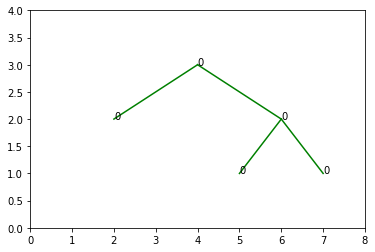

0(0(0)(0))(0)


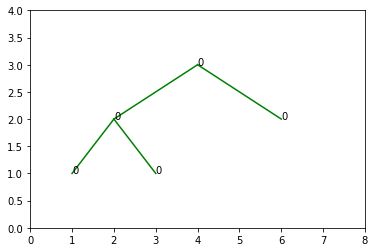

In [5]:
n = 2
trees = BinaryTree.generator(n)
print("Amount:", len(trees))
for tree in trees:
    print(''.join(BinaryTree.tree_to_parentheses(tree)))
    BinaryTree.show(tree)

## Task 1.d
Гістограми ширини і висоти дерев з n=11 вершинами 

Amount of all trees:  58786


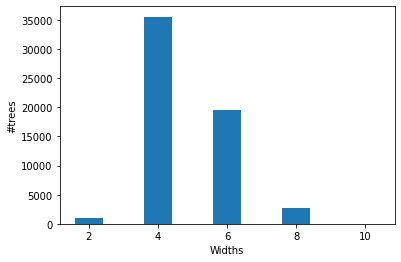

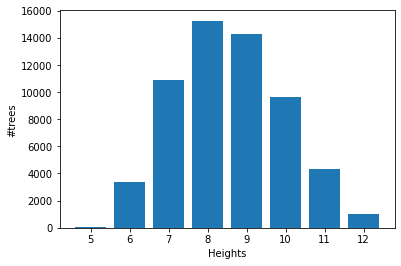

In [6]:
n = 11
trees = BinaryTree.generator(n)
print('Amount of all trees: ', len(trees))

widths = Counter([BinaryTree.get_width(tree) for tree in trees])
heights = Counter([BinaryTree.get_height(tree) for tree in trees])

plt.xlabel('Widths')
plt.ylabel('#trees')
plt.bar(widths.keys(), widths.values())
plt.show()

plt.xlabel('Heights')
plt.ylabel('#trees')
plt.bar(heights.keys(), heights.values())
plt.show()

## Task 1.е
Розробити алгоритм побудови випадкового двійкового дерева

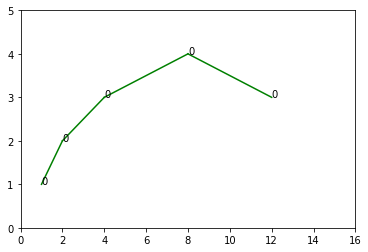

None


In [7]:
tree = BinaryTree.random(5)
print(BinaryTree.show(tree))

## Task 1.f
Розробити алгоритм відображення дерева з n вершинами 100, 200, 500, 1000

0(0(0(0(0)(0()(0(0(0()(0))(0(0)(0(0(0)(0))(0))))(0(0)(0(0))))))(0(0(0(0)(0(0)(0)))(0(0(0(0)(0))(0(0)(0(0(0(0))(0))(0))))(0(0(0(0)(0))(0(0)(0)))(0()(0)))))(0(0(0()(0))(0()(0(0(0(0))(0(0)(0)))(0))))(0()(0(0)(0))))))(0(0(0(0(0(0)(0()(0)))(0(0(0)(0(0(0))(0(0)(0))))(0(0(0(0))(0))(0(0)))))(0(0(0(0))(0))))(0(0(0(0(0(0)(0()(0(0))))(0))(0(0(0(0(0(0(0)(0))(0(0))))(0(0)(0(0()(0(0)))(0))))(0))(0(0))))(0(0)(0(0)(0(0(0()(0)))(0(0()(0))(0))))))(0(0()(0(0()(0))))(0(0(0)(0()(0)))(0(0(0(0)(0(0)(0(0))))(0()(0)))(0))))))(0(0(0(0(0(0(0(0(0))(0))(0(0(0)(0(0)(0(0(0))(0))))(0(0(0(0()(0)))(0))(0(0)(0(0(0(0)(0(0(0))))(0))(0))))))(0(0(0))(0(0(0(0))(0(0(0)(0))))(0()(0)))))(0(0(0()(0()(0(0))))(0(0(0)(0(0(0()(0))(0))(0(0()(0))(0))))(0(0(0))(0(0(0))))))(0(0(0(0(0()(0))(0))(0(0)))(0(0(0(0))(0()(0)))(0)))(0(0(0))(0(0(0(0(0()(0))(0))(0(0)))(0(0)(0(0))))(0(0(0))(0(0)(0(0)))))))))(0(0(0(0(0(0(0)(0(0)))(0(0()(0(0)))))(0(0(0(0))(0()(0)))(0)))(0))(0(0(0))(0)))(0(0(0)(0))(0(0)(0)))))(0(0(0(0)(0(0()(0))(0)))(0(0()(0))))(0(0(0

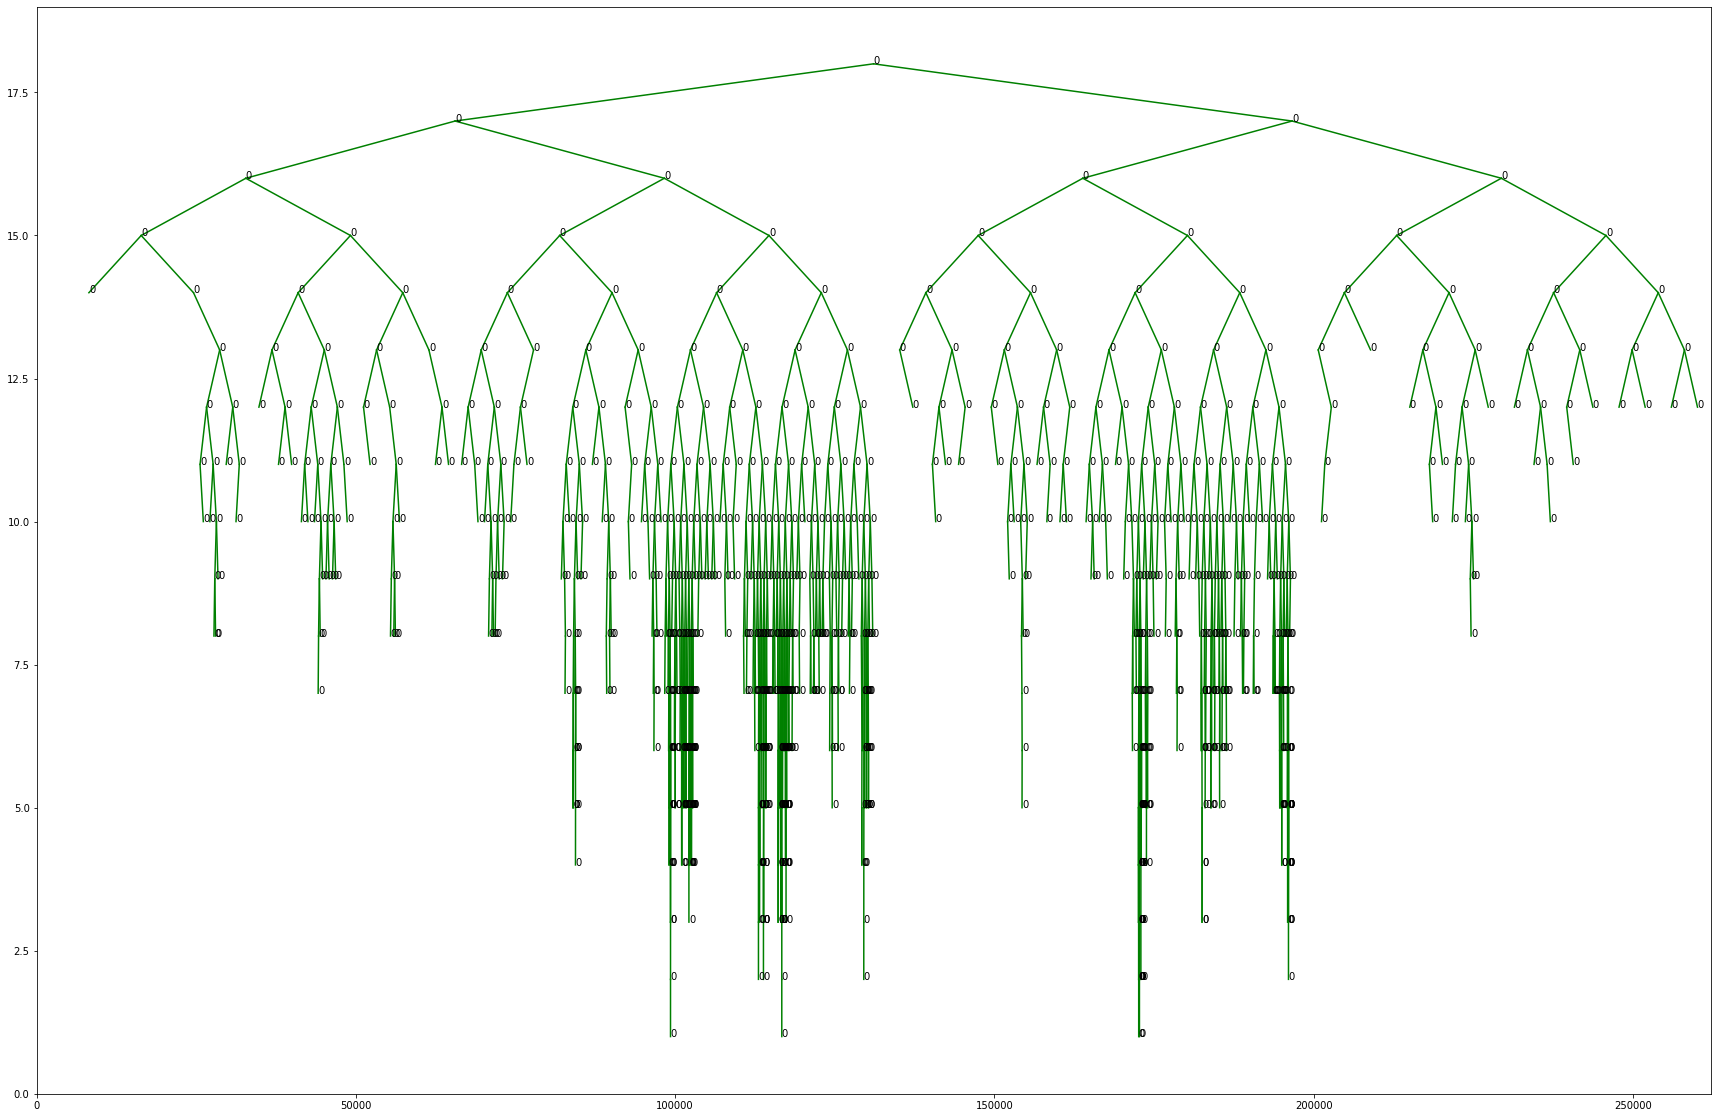

In [8]:
tree = BinaryTree.random(1000)
print(''.join(BinaryTree.tree_to_parentheses(tree)))
BinaryTree.show(tree, big=True)

## Task 1.g
Знайти середню висоту/ширину двійкового дерева з n вершинами

In [9]:
n = 11
trees = BinaryTree.generator(n)

widths = [BinaryTree.get_width(tree) for tree in trees]
heights = [BinaryTree.get_height(tree) for tree in trees]

print('Average width = ', np.average(widths))
print('Average height = ', np.average(heights))

Average width =  4.813118769775117
Average height =  8.558058041030177


## Завдання 2:

In [10]:
class Tree:
    def __init__(self, data):
        self.data = data
        self.children = []

    def insert(self, data):
        self.children.append(Tree(data))

    @staticmethod
    def tree_to_parentheses(tree):
        current = [str(tree.data)]

        for child in tree.children:
            current.append('(')
            current.extend(Tree.tree_to_parentheses(child))
            current.append(')')

        return current

    @staticmethod
    def parentheses_to_tree(parentheses):
        tree = Tree('')
        stack = []

        for p in parentheses:
            if p == '(' :
                tree.insert('')
                stack.append(tree)
                tree = tree.children[-1]

            elif p == ')':
                tree = stack.pop()

            else:
                tree.data = p

        return tree

    @staticmethod
    def get_height(tree):
        childs_height = [0]
        
        for child in tree.children:
            childs_height.append(Tree.get_height(child))

        return 1 + max(childs_height)

    @staticmethod
    def get_width(tree):
        levels = defaultdict(int)

        def _go(node, level):
            nonlocal levels
            levels[level] += 1
            for child in node.children:
                _go(child, level + 1)
            
        _go(tree, 0)

        return max(levels.values())
    
    
    @staticmethod
    def BinaryToGeneral(btree):
        parentheses = [0]
        parentheses.append('(')
        
        def _go(node):
            nonlocal parentheses
            
            parentheses.append(0)
            
            if not node.left and not node.right:
                return
            
            if node.left:
                parentheses.append('(')
                _go(node.left)
                parentheses.append(')')
            if node.right:
                parentheses.append(')')
                parentheses.append('(')
                _go(node.right)
                
                
        _go(btree)
        
        parentheses.append(')')
        
        tree = Tree.parentheses_to_tree(parentheses)
        
        return tree

    
    @staticmethod
    def generator(n):
        binary_trees = BinaryTree.generator(n - 1)
        trees = []
        for btree in binary_trees:
            tree = Tree.BinaryToGeneral(btree)
            trees.append(tree)
        return trees

    @staticmethod
    def show(tree, big=False):
        if big:
            plt.figure(figsize=(30, 20))
            
        # tree parameters
        height = Tree.get_height(tree)
        width = Tree.get_width(tree)
        
        # plot parameters
        plt.xlim(-width , width )
        plt.ylim(0, height + 1)
        
        def _show(node, x, y, neighbors):
            nonlocal height, width
            
            plt.text(x, y, str(node.data))

            children = node.children
            level_width = width / width ** (height - y)
            xs = np.linspace(- level_width / 2, level_width / 2, len(children))
            
            for i, child in enumerate(children):
                x_child = x + xs[i]
                y_child = y - 1
                plt.plot([x, x_child], [y, y_child], c='g')
                _show(child, x_child, y_child, len(children))

        # drawing
        _show(tree, 0, height, 0)

        plt.show()
        
    
    def random(n):
        tree = Tree(0)
        trees = [tree]
        for i in range(1, n):
            random_tree = np.random.choice(trees, size=1)[0]
            random_tree.insert(0)
            trees.append(random_tree.children[-1])
        return tree

## Task 2.a
Переведення дерева у дужки і навпаки

In [11]:
tree = Tree.random(3)

parentheses = Tree.tree_to_parentheses(tree)
print(''.join(parentheses))

tree = Tree.parentheses_to_tree(parentheses)
parentheses = Tree.tree_to_parentheses(tree)
print(''.join(parentheses))

0(0)(0)
0(0)(0)


## Task 2.b
Висота/ширина дерева

In [12]:
tree = Tree.random(3)
parentheses = Tree.tree_to_parentheses(tree)
print(''.join(parentheses))
print("Width", Tree.get_height(tree))
print("Height", Tree.get_width(tree))

0(0(0))
Width 3
Height 1


## Task 2.c
Побудова всіх дерев з n вершин

In [13]:
n = 4
trees = Tree.generator(n)
print("Amount:", len(trees))
for tree in trees:
    print(''.join(Tree.tree_to_parentheses(tree)))
#     Tree.show(tree)

Amount: 5
0(0(0))(0(0))(0(0))(0)
0(0(0))(0(0(0))(0))(0)
0(0(0(0))(0))(0(0))(0)
0(0(0(0))(0(0))(0))(0)
0(0(0(0(0))(0))(0))(0)


## Task 2.d
Гістограми ширини і висоти дерев з n=10 вершинами 

Amount of all trees:  4862


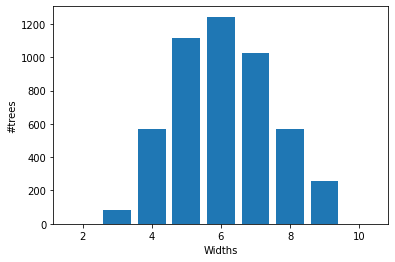

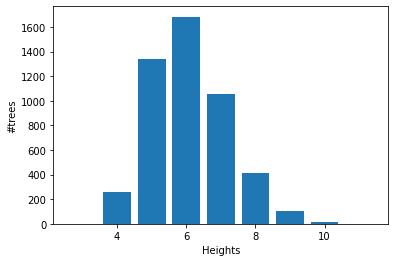

In [14]:
n = 10
trees = Tree.generator(n)
print('Amount of all trees: ', len(trees))

widths = Counter([Tree.get_width(tree) for tree in trees])
heights = Counter([Tree.get_height(tree) for tree in trees])

plt.xlabel('Widths')
plt.ylabel('#trees')
plt.bar(widths.keys(), widths.values())
plt.show()

plt.xlabel('Heights')
plt.ylabel('#trees')
plt.bar(heights.keys(), heights.values())
plt.show()

## Task 2.е
Розробити алгоритм побудови випадкового дерева

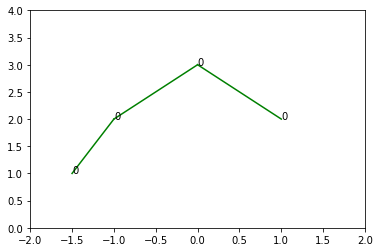

In [15]:
tree = Tree.random(4)
Tree.show(tree)

## Task 2.f
Розробити алгоритм відображення дерева з n вершинами 100, 200, 500, 1000

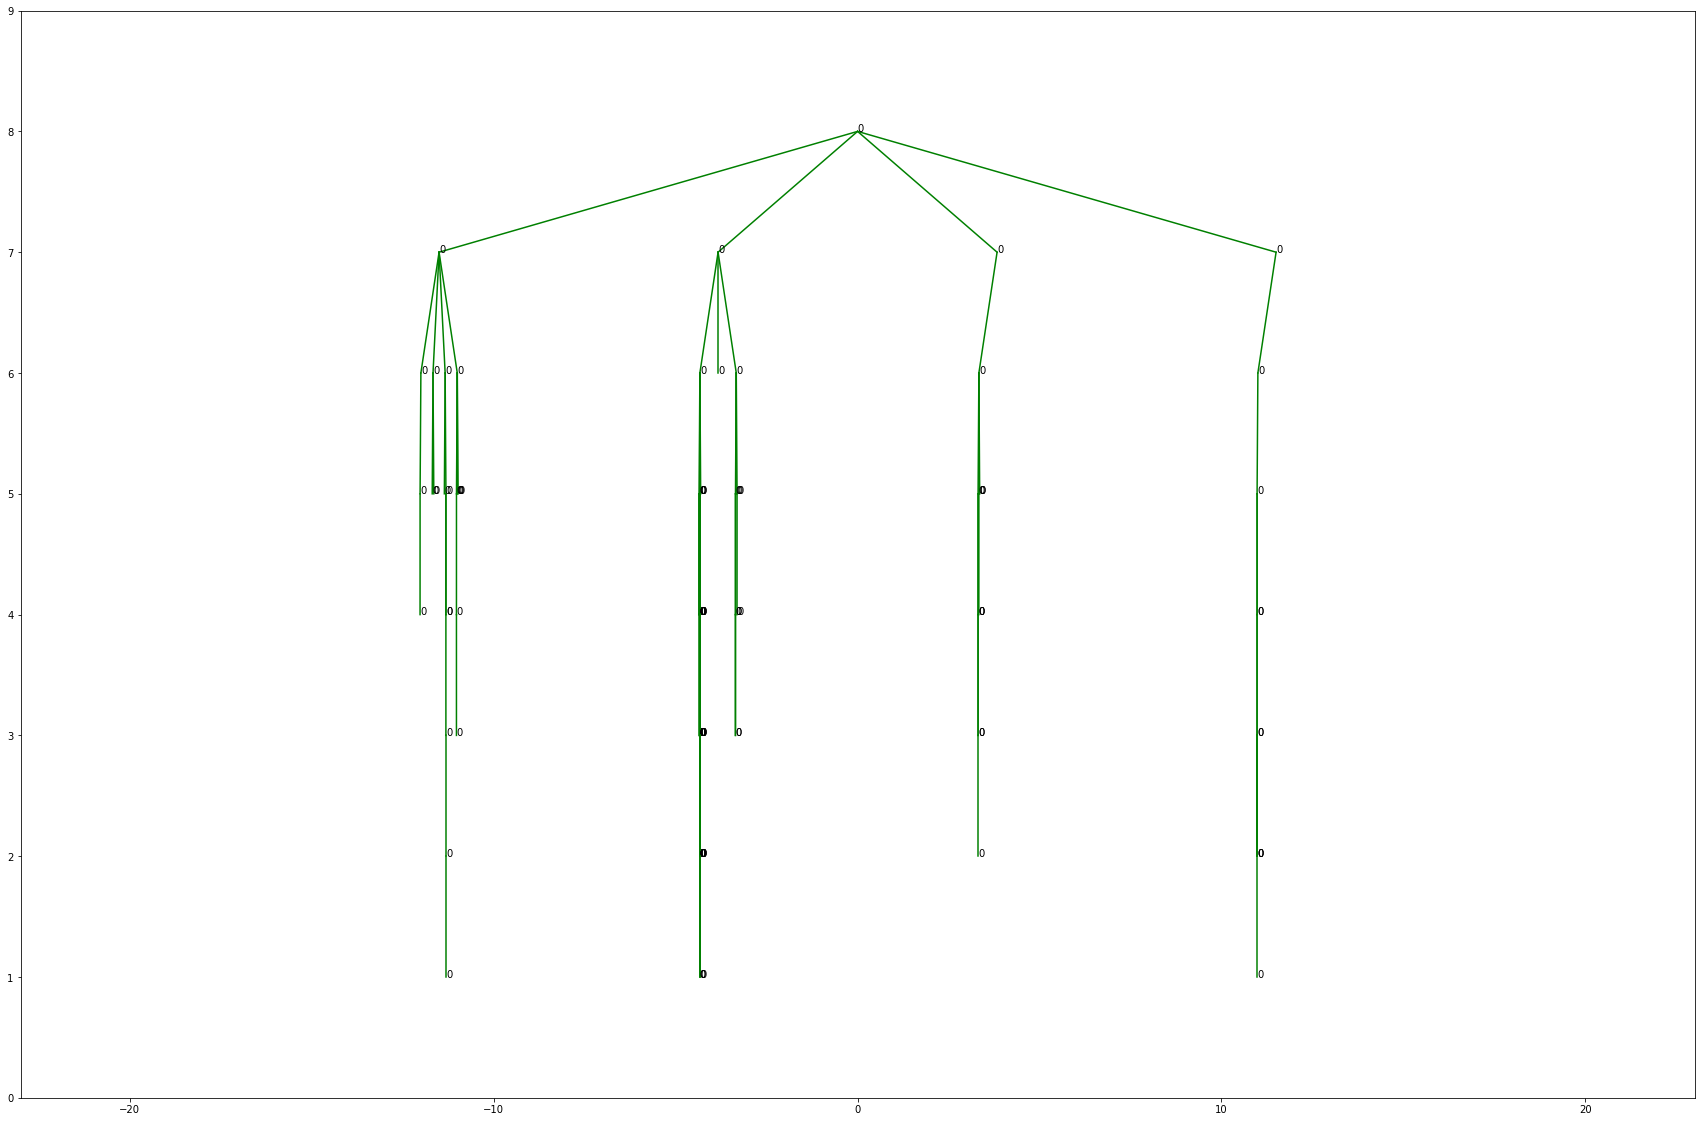

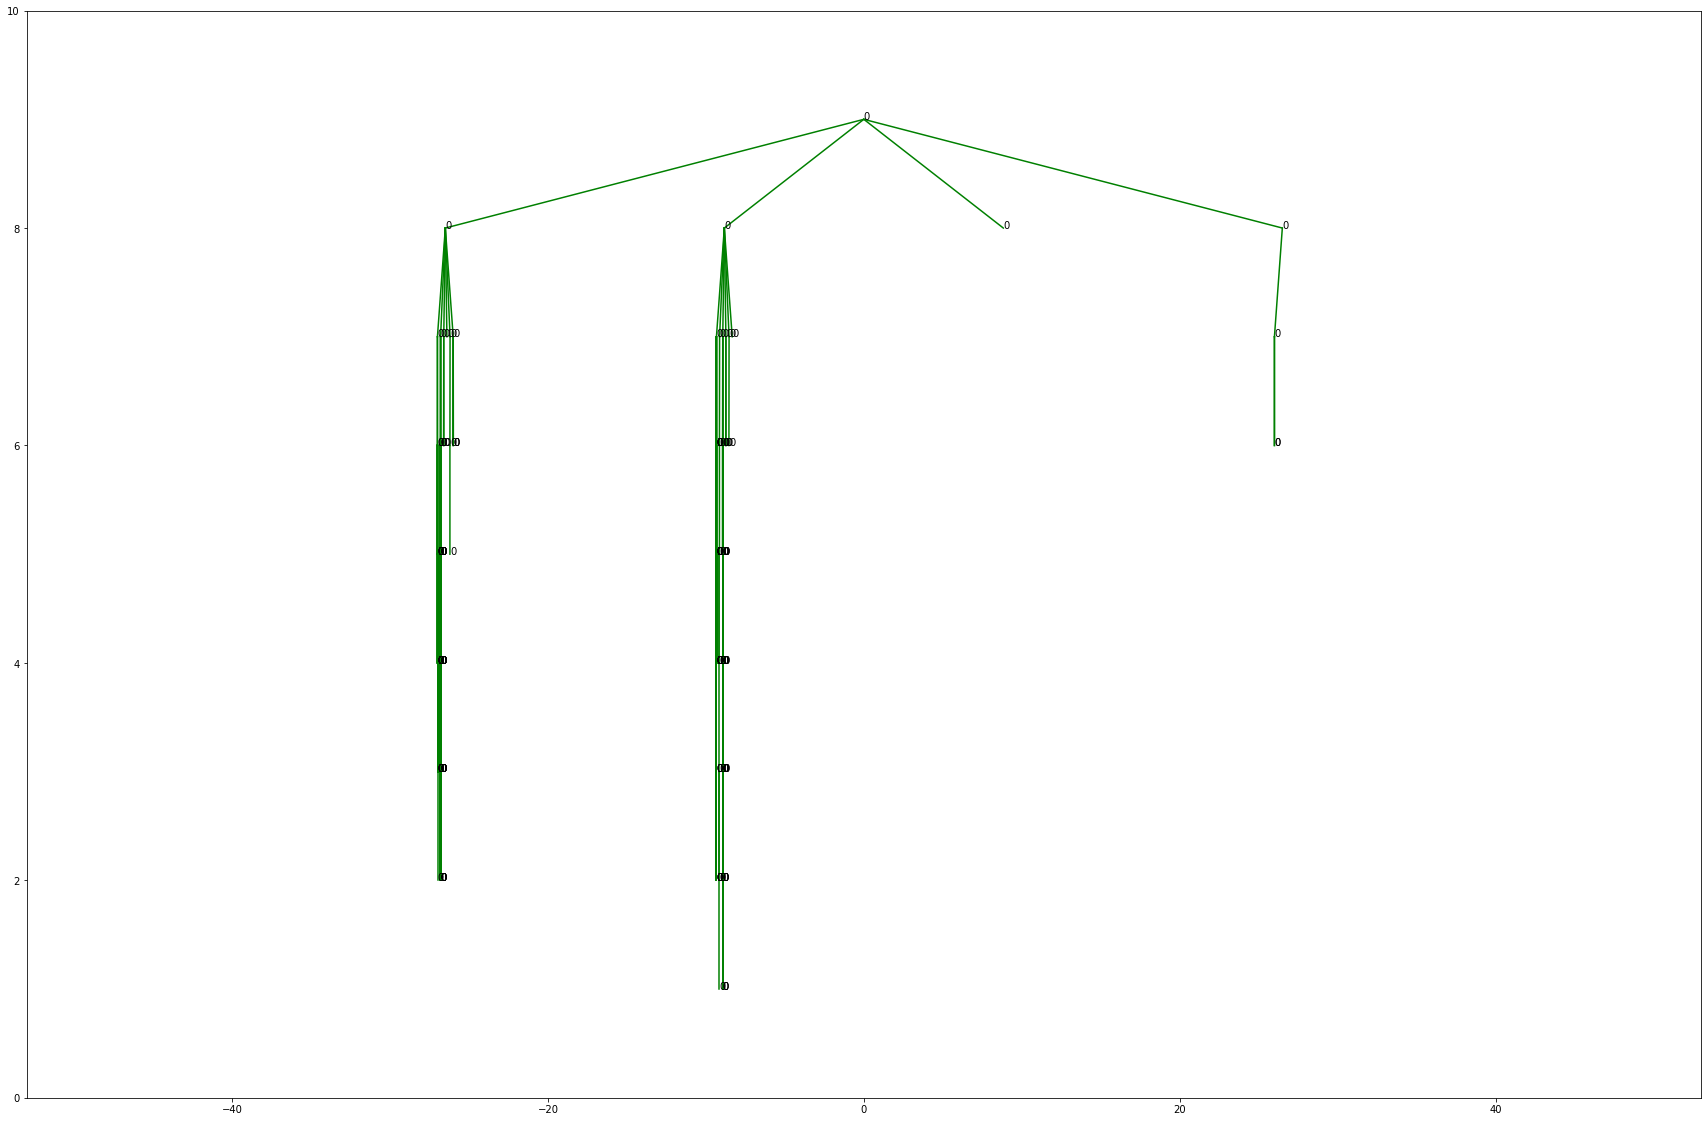

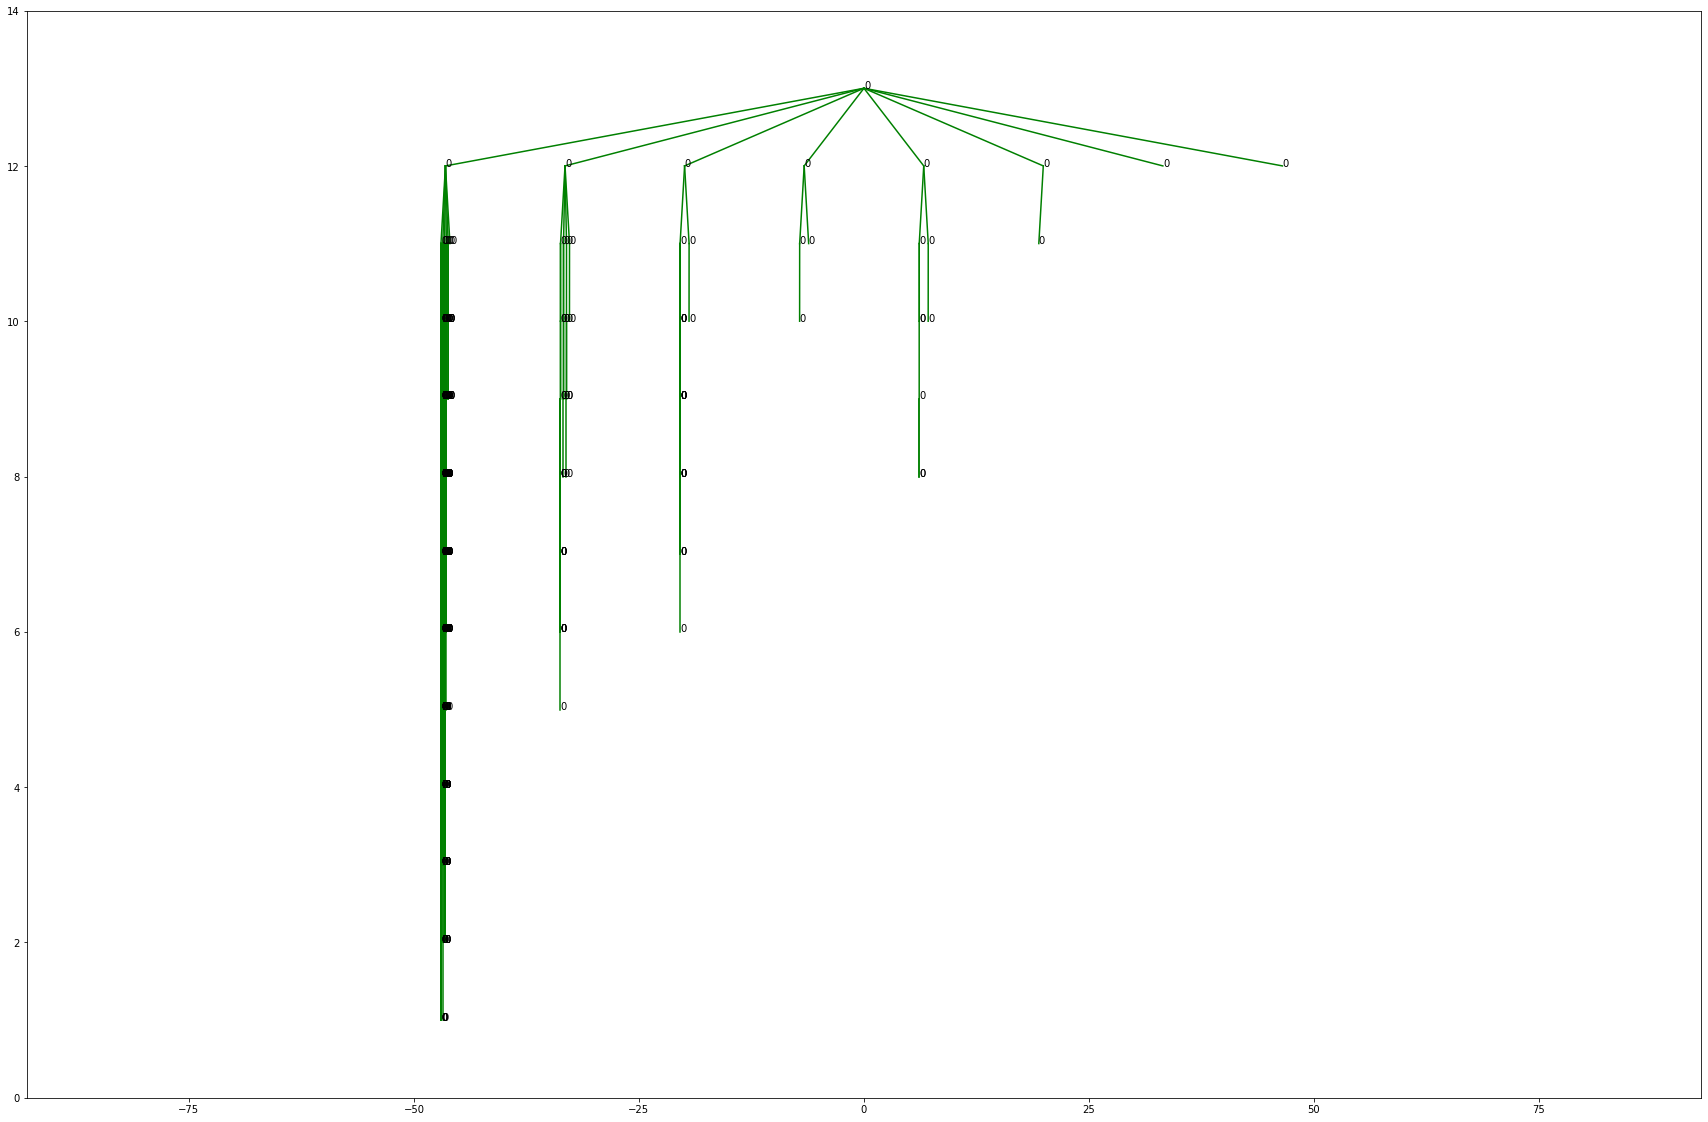

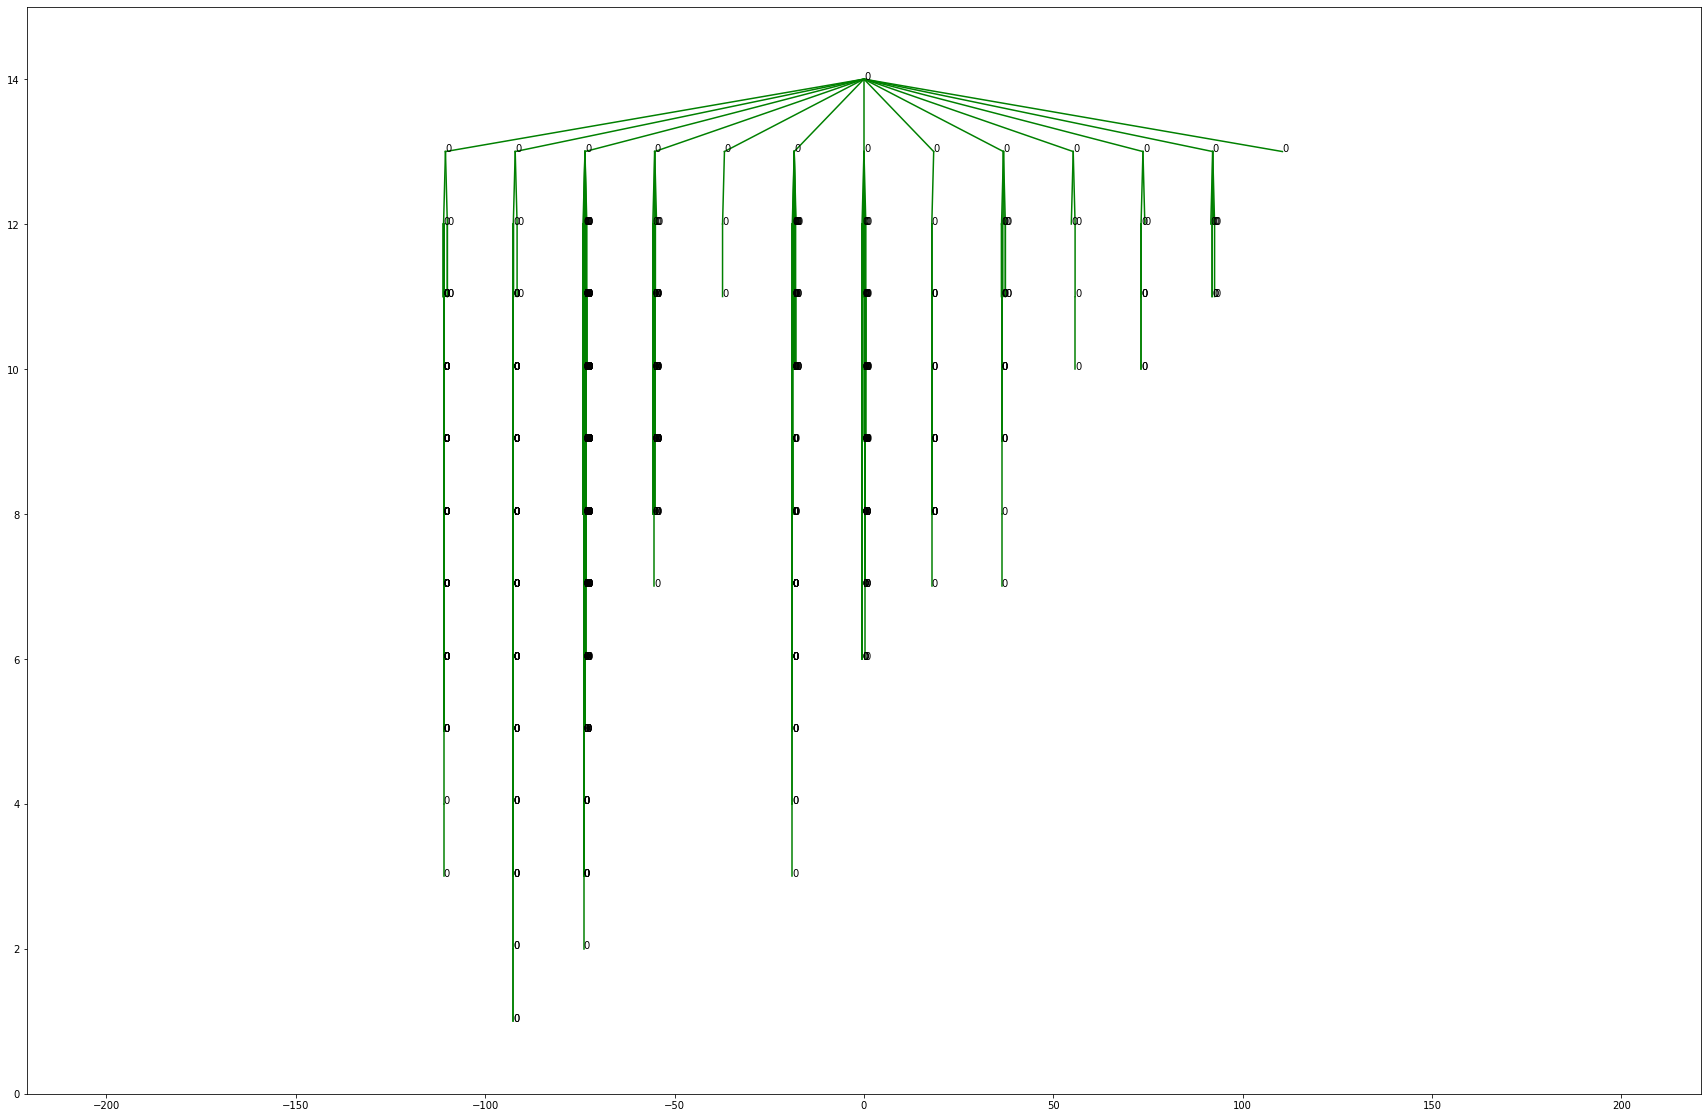

In [16]:
tree = Tree.random(100)
Tree.show(tree, big=True)

tree = Tree.random(200)
Tree.show(tree, big=True)

tree = Tree.random(500)
Tree.show(tree, big=True)

tree = Tree.random(1000)
Tree.show(tree, big=True)

## Task 2.g
Знайти середню висоту/ширину двійкового дерева з n вершинами

In [17]:
n = 10
trees = Tree.generator(n)

widths = [Tree.get_width(tree) for tree in trees]
heights = [Tree.get_height(tree) for tree in trees]

print('Average width = ', np.average(widths))
print('Average height = ', np.average(heights))

Average width =  6.086589880707527
Average height =  6.080213903743315


## Завдання 3:

In [18]:
class BST (BinaryTree):
    def __init__(self, *params):
        BinaryTree.__init__(self, *params)
    
    def insert(self, data):
        cost = None
        
        if self.data is None:
            self.data = data
            cost = 1
        
        if data < self.data:
            if not self.left:
                self.left = BST(data)
                cost = 1
            else:
                cost = 1 + self.left.insert(data)
        elif data > self.data:
            if not self.right:
                self.right = BST(data)
                cost = 1
            else:
                cost = 1 + self.right.insert(data)

        assert cost is not None, 'Can\'t evaluate cost of insert operation.'
        
        return cost
    
    def search(self, data):
        found = False
        cost = None
        
        if self.data == data:
            found = True
            cost = 1
        
        elif data < self.data:
            if self.left:
                found, cost = self.left.search(data)
                cost += 1
            else:
                found = False
                cost = 1
                
        elif data > self.data:
            if self.right:
                found, cost = self.right.search(data)
                cost += 1
            else:
                found = False
                cost = 1

        assert cost is not None, 'Can\'t evaluate cost of search operation.'
        
        return found, cost
        
    @staticmethod
    def from_permutation(permutation):
        tree = BST(None)
        for number in permutation:
            tree.insert(number)
        return tree
    
    @staticmethod
    def random(n):
        permutation = np.random.permutation(range(1, n + 1))
        return BST.from_permutation(permutation)

    @staticmethod
    def get_average_building_cost(n):
        cost = 0
        tree = BST(None)
        permutation = np.random.permutation(range(1, n + 1))
        for number in permutation:
            cost += tree.insert(number)
        return cost / n
    
    @staticmethod
    def generator(n):
        trees = []
        all_permutations = permutations(range(1, n + 1)) 
        for permutation in all_permutations:
            tree = BST.from_permutation(permutation)
            trees.append(tree)
        return trees

## Task 3.a
Побудова двійкового дерева пошуку за перестановкою чисел 1..n

Permutation:  [ 6  2 10  8  9  7  4  5  1  3]
Tree: 6(2(1)(4(3)(5)))(10(8(7)(9)))


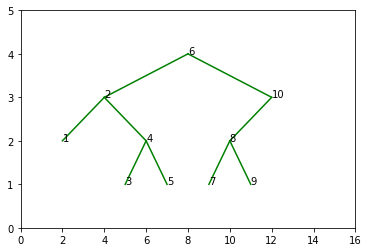

In [19]:
n = 10
permutation = np.random.permutation(range(1, n + 1))
print("Permutation: ", permutation)

tree = BST.from_permutation(permutation)

print("Tree: ", *BinaryTree.tree_to_parentheses(tree), sep='')
BST.show(tree)

## Task 3.b
Побудова випадкового дерева з n вершин.

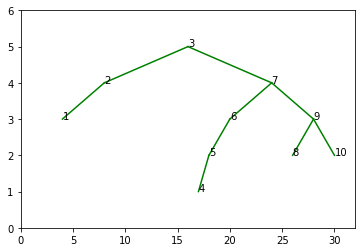

In [20]:
tree = BST.random(10)
BST.show(tree)

## Task 3.c
Знаходження висоти/ширини дерева.

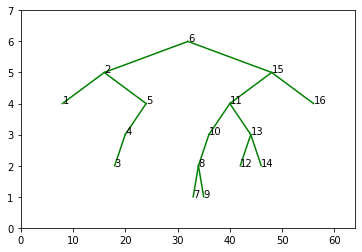

Height 6
Width 4


In [21]:
tree = BST.random(16)
BST.show(tree)
print("Height", BST.get_height(tree))
print("Width", BST.get_width(tree))

## Task 3.d
Гістограми ширини, висоти і вартості побудови дерев з n=10 вершинами

Amount of all trees:  3628800


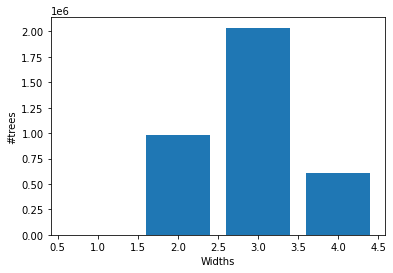

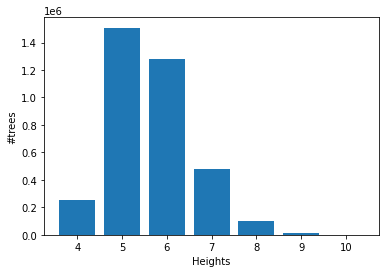

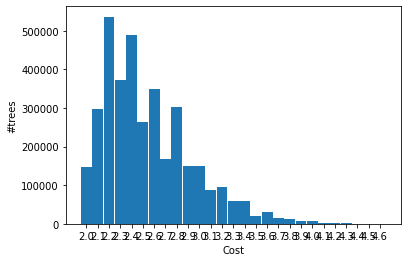

In [22]:
n = 10
trees = BST.generator(n)
print('Amount of all trees: ', len(trees))

widths = Counter([BST.get_width(tree) for tree in trees])
heights = Counter([BST.get_height(tree) for tree in trees])
costs = Counter([BST.get_average_building_cost(n) for i in range(len(trees))])

plt.xlabel('Widths')
plt.ylabel('#trees')
plt.bar(widths.keys(), widths.values())
plt.show()

plt.xlabel('Heights')
plt.ylabel('#trees')
plt.bar(heights.keys(), heights.values())
plt.show()

plt.xlabel('Cost')
plt.ylabel('#trees')
plt.xticks(list(costs.keys()))
plt.bar(costs.keys(), costs.values(), 
        width=(max(costs.keys()) - min(costs.keys())) / len(costs.keys()))
plt.show()

## Task 3.e
Обчислити середню висоту/ширину дерева пошуку з n вершин.

In [23]:
n = 8
trees = BST.generator(n)

widths = [BST.get_width(tree) for tree in trees]
heights = [BST.get_height(tree) for tree in trees]

print('Average width = ', np.average(widths))
print('Average height = ', np.average(heights))

Average width =  2.4781746031746033
Average height =  5.017460317460317


## Task 3.f
Проведіть 10000 випадкових пошуків у випадковому дереві з 1000 вершин.  
Зобразіть гістограму вартості пошуку.

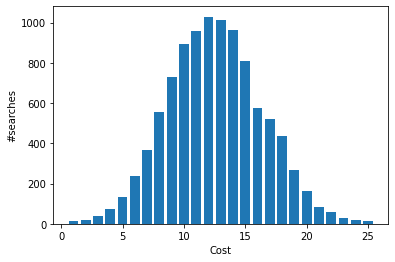

In [24]:
tree = BST.random(1000)
costs = defaultdict(int)

for i in range(10000):
    random_data = np.random.randint(1, 1 * 1000)
    found, cost = tree.search(random_data)
    costs[cost] += 1
    
plt.xlabel('Cost')
plt.ylabel('#searches')
plt.bar(costs.keys(), costs.values())
plt.show()